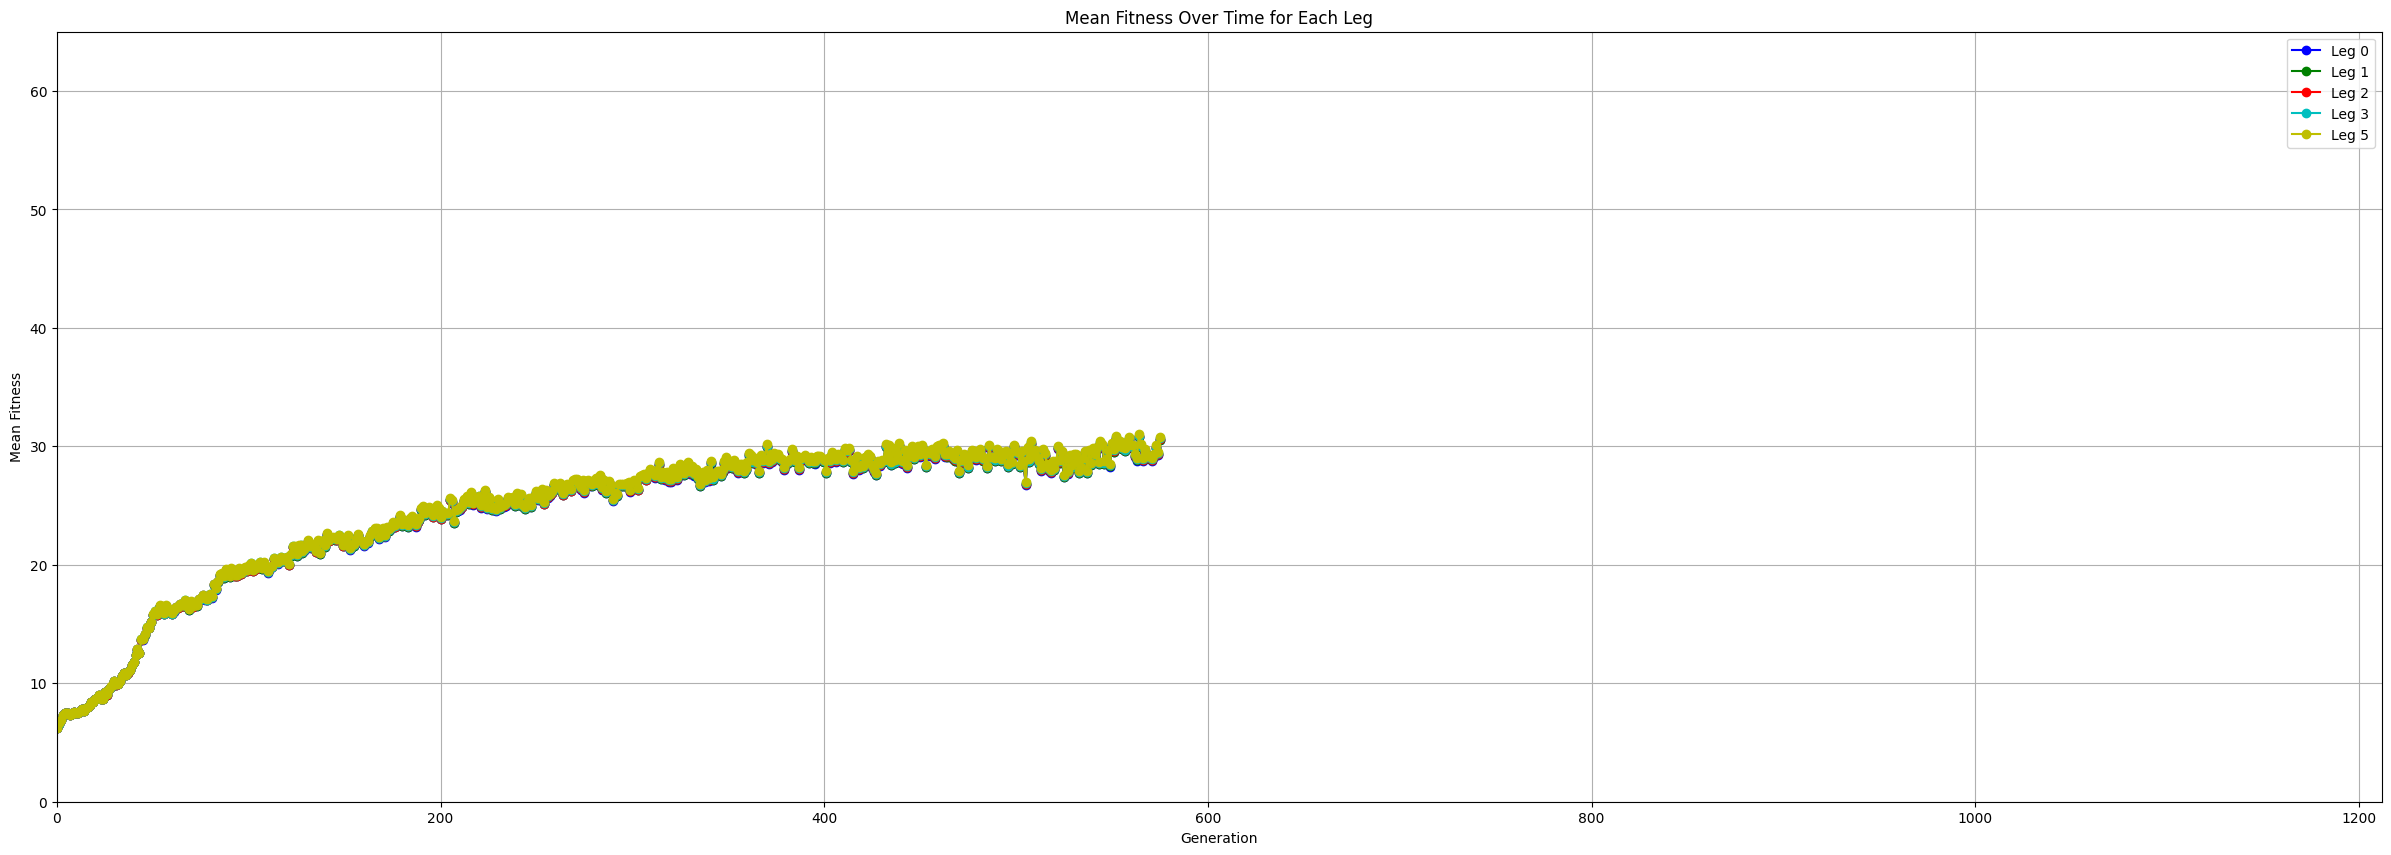

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
file_path = 'evolution_data.csv'
data = pd.read_csv(file_path)

# Filter data to include only generations up to 1200
data = data[data['Generation'] <= 1200]

# Get unique leg indices
leg_indices = data['Leg Index'].unique()

# Define a color map for leg indices
color_map = {
    0: 'b',  # Blue
    1: 'g',  # Green
    2: 'r',  # Red
    3: 'c',  # Cyan
    4: 'm',  # Magenta
    5: 'y',  # Yellow
}

# Create a plot for each leg on the same graph
plt.figure(figsize=(30, 10))

for leg_index in leg_indices:
    # Filter data for the current leg
    leg_data = data[data['Leg Index'] == leg_index]
    
    # Group by generation and calculate the mean fitness for each generation
    fitness_over_time = leg_data.groupby('Generation')['Fitness'].mean()
    
    # Plot the fitness over time for the current leg
    color = color_map.get(leg_index, 'k')  # Default to black if leg index not in color_map
    plt.plot(fitness_over_time, marker='o', label=f'Leg {leg_index}', color=color)

# Add title and labels
plt.title('Mean Fitness Over Time for Each Leg')
plt.xlabel('Generation')
plt.ylabel('Mean Fitness')
plt.grid(True)

# Set y/x-axis limits
plt.ylim(0, 65)
plt.xlim(0, 1212)

# Add legend
plt.legend()

# Show plot
plt.show()

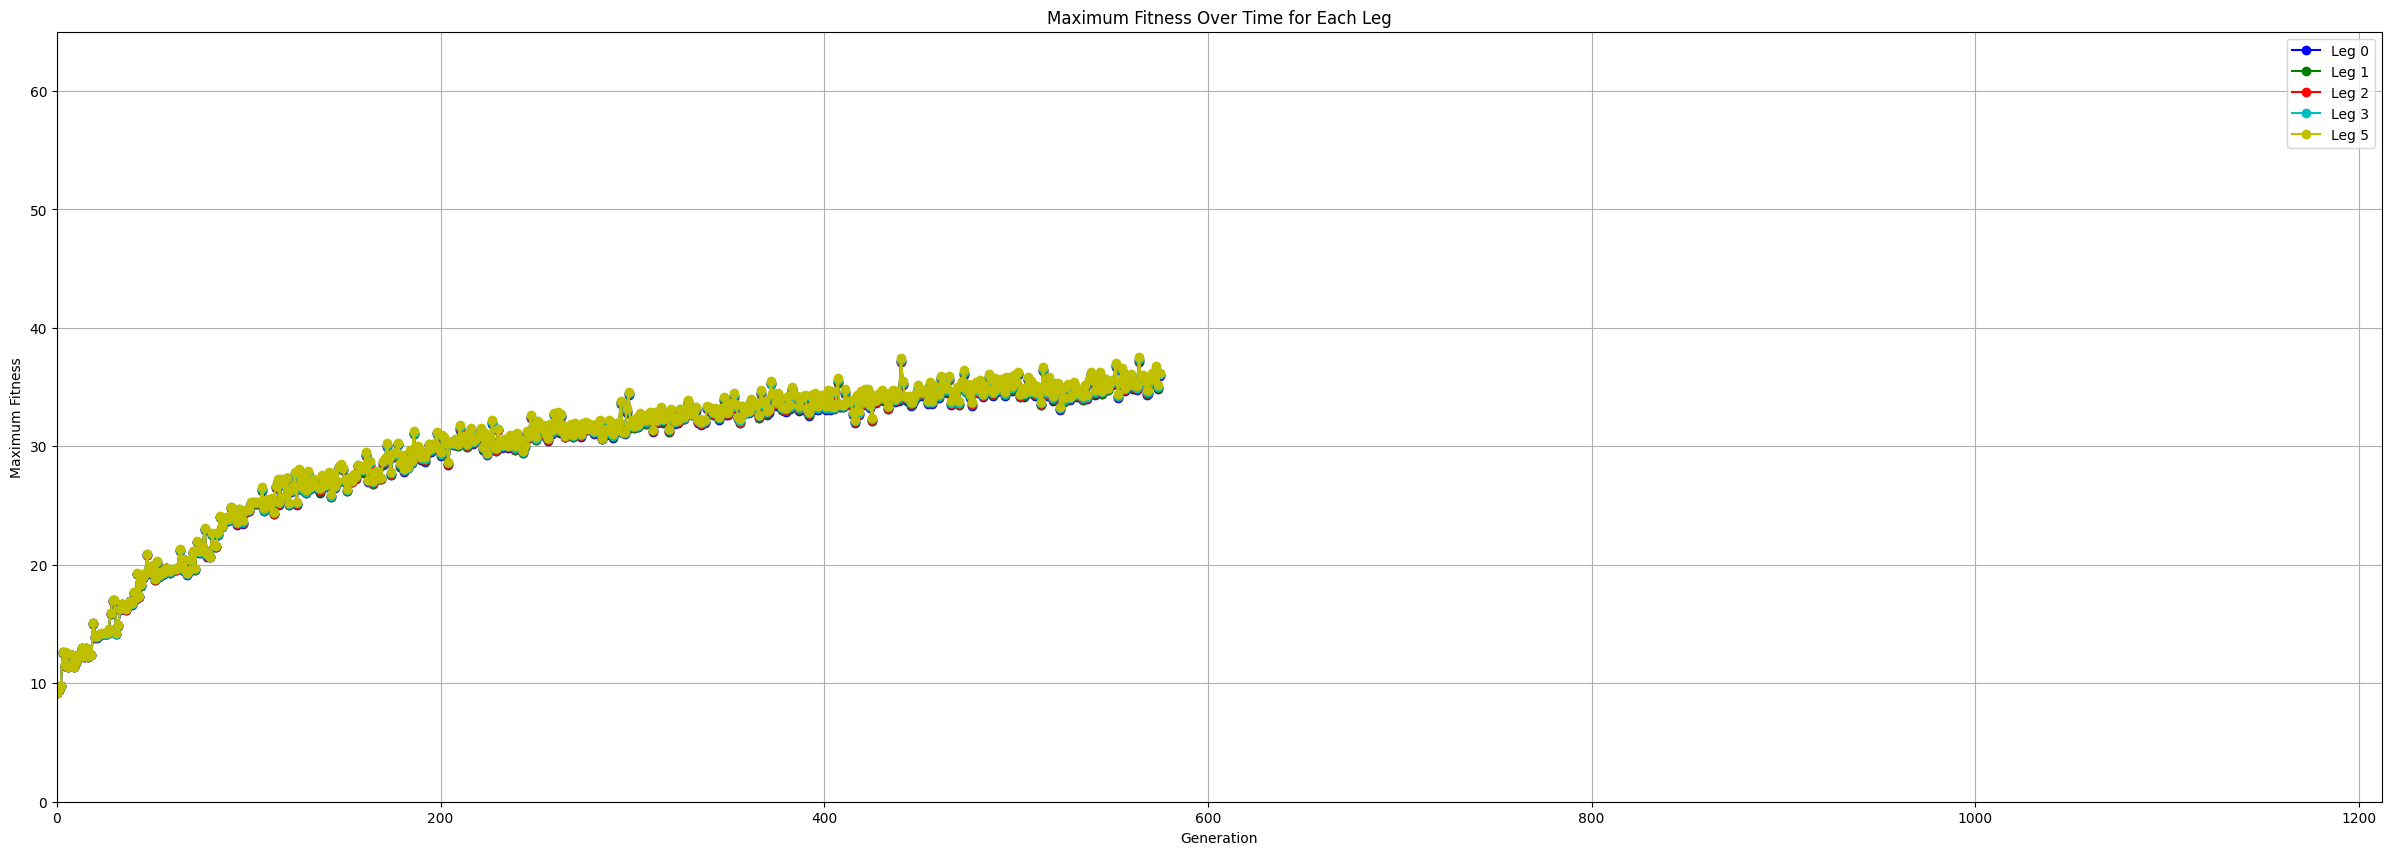

In [2]:
# Create a plot for each leg on the same graph
plt.figure(figsize=(30, 10))

for leg_index in leg_indices:
    # Filter data for the current leg
    leg_data = data[data['Leg Index'] == leg_index]
    
    # Group by generation and calculate the mean fitness for each generation
    fitness_over_time = leg_data.groupby('Generation')['Fitness'].max()
    
    # Plot the fitness over time for the current leg
    color = color_map.get(leg_index, 'k')  # Default to black if leg index not in color_map
    plt.plot(fitness_over_time, marker='o', label=f'Leg {leg_index}', color=color)

# Add title and labels
plt.title('Maximum Fitness Over Time for Each Leg')
plt.xlabel('Generation')
plt.ylabel('Maximum Fitness')
plt.grid(True)

# Set y/x-axis limits
plt.ylim(0, 65)
plt.xlim(0, 1212)

# Add legend
plt.legend()

# Show plot
plt.show()